In [ ]:
import tensorflow as tf
print(tf. __version__)

2.12.0


In [ ]:
import keras 
print(keras.__version__)

2.12.0


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.2.2.


In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D,  Activation
from keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
#from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_excel("/content/drive/MyDrive/Data712/BF/fake.xlsx")
authentic = pd.read_excel("/content/drive/MyDrive/Data712/BF/real.xlsx")
print(len(fake))

1339


In [ ]:
%%capture
!pip3 install git+https://github.com/csebuetnlp/normalizer

In [ ]:
from normalizer import normalize
def norm(txt):
  return normalize(txt)

In [ ]:
for i in range(len(fake)):
  fake['Translated'][i]=norm(fake['Translated'][i])

<ipython-input-9-9bd2991d49d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['Translated'][i]=norm(fake['Translated'][i])


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data712/BF/augmentedwithnormalized.xlsx")

In [ ]:
#x=df['Translated'][0][2:-2]
for i in range(len(df)):
  df['Translated'][i]=df['Translated'][i][2:-2]

<ipython-input-11-dca4b9ebde82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Translated'][i]=df['Translated'][i][2:-2]


In [ ]:
len(df)

1339

In [ ]:
authentic1= authentic.sample(frac=0.3474)
#authentic1= authentic[0:2678]
print(len(authentic1))
#authentic1['Translated'][0]

2678


In [ ]:
concated1 = pd.concat([authentic1[['Translated','Label']],fake[['Translated','Label']]])
concated1.reset_index(drop=True,inplace=True)

In [ ]:
for i in range(len(concated1)):
  #print(i)
  concated1['Translated'][i]=norm(concated1['Translated'][i])

<ipython-input-14-2bed8d9e8e6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concated1['Translated'][i]=norm(concated1['Translated'][i])


In [ ]:
concated2 = pd.concat([concated1[['Translated','Label']],df[['Translated','Label']]])
concated2.reset_index(drop=True,inplace=True)

In [ ]:
concated2['text'] = concated2['Translated']

In [ ]:
concated2 = concated2.drop(['Translated'],axis=1)

In [ ]:
concated2.head(100)

,Label,text
0,1,৪ ৫ পিস মাটনের সাথে এক গাদা রাইস যাহা ১জনের জন...
1,1,আইটেম চান্দুর নেহারী লোকেশন মিরপুর ১২ ই ব্লক ক...
2,1,স্বল্প খরচে উত্তরাতে লাঞ্চ সারার জন্য সেরা । ই...
3,1,স্থান হটপ্লেটখানা খাইদ্য চিকেন স্টেক রাইস বিফ ...
4,1,বাংলাদেশি খাদ্য পর্যালোচক ফাহিম ভাইয়ার রিভিউ ...
...,...,...
95,1,এক এইচ আর উপদেশ দিয়ে ছিল গত মাসে ফালুদার পোষ্...
96,1,পজিটিভ রিভিউ অসাধারণ এক কাচ্চির গল্প। জলপ্রপাত...
97,1,দ্য পাবুলাম কমের ভিতর টাওয়ার সমান বার্গার খুব...
98,1,যাদের মুরগীর চাপ গরুর চাপ শিক কাবাব বটি কাবাব ...


In [ ]:
concated2.loc[concated2.Label == 0].sample(5)[['text', 'Label']]

,text,Label
4259,ইয়েস ভাই জিত্তা গেসি আমার পাচক এর ২ মিনিট এর ...,0
3766,সিজলিং আর মাংসের ফালি একসাথে চাই গত পরশু দুই ভ...,0
3949,৩৫০ টাকায় ৩ জনের কম্বো অফার । সিগারেটের শেষ ট...,0
4848,বাশ বাগান বাঁশ বাগান খুলনা আজকের অফার সেট মেনু...,0
3231,ডিতিওন তিহ্যবাহী বাংলা ইফতার রাতের খাবার খাবার...,0


In [ ]:
concated2 = concated2.sample(frac=1).reset_index(drop=True)

In [ ]:
len(concated2)

5356

In [ ]:
# Get the lists of sentences and their labels.
sentences = concated2.text.values
labels = concated2.Label.values

In [ ]:
len(sentences)

5356

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from keras.utils.np_utils import to_categorical

In [ ]:
[train_I, rest_I,train_L,rest_L]= train_test_split(sentences,labels, test_size=0.2,train_size=0.8, shuffle=True, stratify=labels)
[val_I, test_I,val_L,test_L]= train_test_split(rest_I, rest_L, test_size=0.5,train_size=0.5, shuffle=True, stratify=rest_L)   
        


In [ ]:
len(val_I)

536

In [ ]:
training_sentences = []
testing_sentences = []
val_sentences = []
train_sentences = list(train_I)
train_labels = train_L
for i in range(len(train_sentences)): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
training_sentences=np.array(training_sentences)

test_sentences=list(test_I)
test_labels=test_L

for i in range(len(test_sentences)): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
testing_sentences=np.array(testing_sentences)

validation_sentences=list(val_I)
val_labels=val_L

for i in range(len(validation_sentences)): 
    x=str(validation_sentences[i])
    val_sentences.append(x)
val_sentences=np.array(val_sentences)


train_labels=keras.utils.to_categorical(train_labels)
test_labels=keras.utils.to_categorical(test_labels)
val_labels=keras.utils.to_categorical(val_labels)

# print("Training Set Length: "+str(len(train1)))
# print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("validation_sentences shape: "+str(val_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("val_labels shape: "+str(val_labels.shape))

training_sentences shape: (4284,)
testing_sentences shape: (536,)
validation_sentences shape: (536,)
train_labels shape: (4284, 2)
test_labels shape: (536, 2)
val_labels shape: (536, 2)


In [ ]:
vocab_size = 25000
embedding_dim = 300
max_length = 512
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences,maxlen=max_length)

31549
Word index length:31549


In [ ]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

খুলনার অন্যতম বেস্ট খাসির হালিম রেটিং ১০ ১০ ব্যাবহার ১০ ১০ প্রাইস ৫০ টাকা তবে ৩০ থেকে শুরু লোকেশন রূপসা ট্রফিক মোড় রূপসা আংকেল ভ্যানে করে সেল করেন সন্ধ্যার পর থেকে রাত ১০ টা অবদি থাকেন তার ব্যাবহার ও খাবার কোয়ালিটি একদম সেরা যারা আগে ট্রাই করেছেন তারা অলরেডি জানেন কেমন আর যারা করেন নাই তাদের বলব একবার ট্রাই করতে ধন্যবাদ

Sentence Tokenized and Converted into Sequence :--> 

[4686, 1454, 100, 698, 675, 62, 4, 4, 1245, 4, 4, 191, 244, 10, 71, 218, 28, 214, 166, 11683, 17919, 827, 11683, 11684, 17920, 13, 2663, 462, 2065, 113, 28, 550, 4, 19, 17921, 798, 134, 1245, 36, 20, 481, 148, 135, 224, 162, 96, 2066, 80, 4110, 2067, 381, 3, 224, 462, 98, 16, 760, 397, 96, 54, 293]

After Padding the Sequence with padding length 100 :--> 

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0   

In [ ]:
with tf.device('/gpu:0'):
    import keras
    from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense,Dropout,Embedding

    max_words_len=350
    #def create_Att_Model(max_words_len, embedding_size, embedding_matrix):
    encoder_input=keras.Input(shape=(max_words_len,),)
    encoder_embedding = Embedding(vocab_size, embedding_dim, input_length=max_length)


    encoder_embedding_layer=encoder_embedding(encoder_input)
    #layer1=Bidirectional(LSTM(NN_dim_1,return_sequences=True))
    #encoder_output=layer1(encoder_embedding_layer)

    conv1D_1=Conv1D(512, 4, activation='relu',name='con1')(encoder_embedding_layer)
    maxPool1D_1=MaxPooling1D(pool_size=2,name='maxpool1')(conv1D_1)

    conv1D_2=Conv1D(256, 3, activation='relu',name='con2')(maxPool1D_1)
    maxPool1D_2=MaxPooling1D(pool_size=2,name='maxpool2')(conv1D_2)

    conv1D_3=Conv1D(128, 2, activation='relu',name='con3')(maxPool1D_2)
    maxPool1D_3=MaxPooling1D(pool_size=2,name='maxpool3')(conv1D_3)




    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = tf.keras.layers.Bidirectional(
        keras.layers.LSTM(100, return_sequences=True)
    )(maxPool1D_3)

    # Attention Mechanism - Generate attention vectors
    input_dim = int(lstm_outs.shape[2])
    permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
    attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
    print(attention_vector.shape)
    attention_vector = keras.layers.Reshape((attention_vector.shape[1],))(attention_vector)
    attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
    attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

    # Last layer: fully connected with softmax activation
    fc = keras.layers.Dense(100, activation='relu')(attention_output)
    output = keras.layers.Dense(2, activation='softmax')(fc)

    # Finally building model
    model = keras.Model(inputs=[encoder_input], outputs=output)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

    # Print model summary
    model.summary()



(None, 42, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 350, 300)     7500000     ['input_1[0][0]']                
                                                                                                  
 con1 (Conv1D)                  (None, 347, 512)     614912      ['embedding[0][0]']              
                                                                                                  
 maxpool1 (MaxPooling1D)        (None, 173, 512)     0           ['con1[0][0]']                   
                                                                                

In [ ]:
history=model.fit(padded,train_labels,epochs=20,batch_size=256,validation_data=(val_padded,val_labels),use_multiprocessing=True, workers=8)

Epoch 1/20
17/17 [==============================] - 18s 225ms/step - loss: 0.6729 - accuracy: 0.5686 - val_loss: 0.6741 - val_accuracy: 0.7593
Epoch 2/20
17/17 [==============================] - 2s 139ms/step - loss: 0.3915 - accuracy: 0.8366 - val_loss: 0.3951 - val_accuracy: 0.8433
Epoch 3/20
17/17 [==============================] - 2s 139ms/step - loss: 0.1454 - accuracy: 0.9521 - val_loss: 0.3805 - val_accuracy: 0.8881
Epoch 4/20
17/17 [==============================] - 2s 145ms/step - loss: 0.0669 - accuracy: 0.9818 - val_loss: 0.3149 - val_accuracy: 0.9067
Epoch 5/20
17/17 [==============================] - 2s 142ms/step - loss: 0.0326 - accuracy: 0.9916 - val_loss: 0.4047 - val_accuracy: 0.8918
Epoch 6/20
17/17 [==============================] - 2s 140ms/step - loss: 0.0231 - accuracy: 0.9946 - val_loss: 0.3070 - val_accuracy: 0.9123
Epoch 7/20
17/17 [==============================] - 2s 140ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.3394 - val_accuracy: 0.9104
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


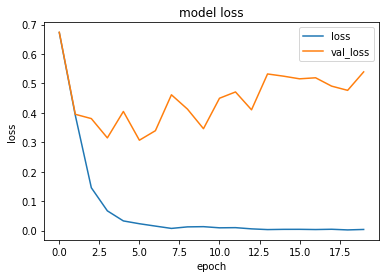

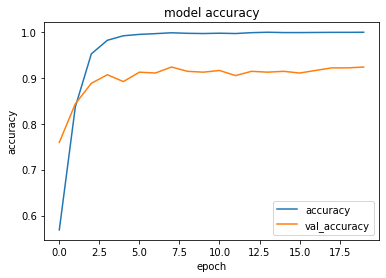

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

3/3 [==============================] - 0s 39ms/step - loss: 0.6657 - accuracy: 0.8825
The test accuracy is: 0.8824626803398132


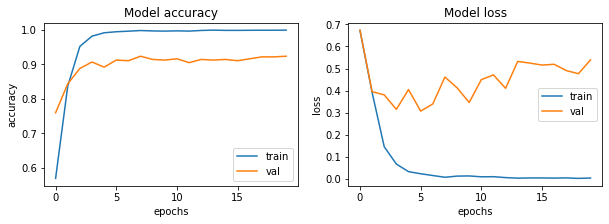

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val']) 



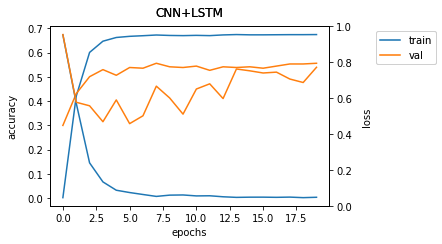

In [ ]:
# clr=["#97523c","#3ca2d0","#1f77b4","#ff7f0e"]

clr=["#1f77b4","#ff7f0e","#1f77b4","#ff7f0e"]
# y=1.12

fig, ax = plt.subplots(figsize=(5, 3.3))
ax.set_yticks([])

for i, met in enumerate(['accuracy', 'loss']):
    ax.plot(history.history[met],c=clr[i+i])
    ax.plot(history.history['val_' + met], c=clr[i+i+1])
    # ax.set_title('Model {}'.format(met), pad=16, y=y)
    ax.set_title('CNN+LSTM',pad=10)
    ax.set_xlabel('epochs')    
    ax.set_ylabel(met, labelpad=33)
    
    ax.legend(['train', 'val'],bbox_to_anchor=(1.4, 1))
    ax = ax.twinx()
    # y=1
    


    # ax.get_yaxis().set_visible(False)
plt.savefig("/content/drive/MyDrive/Data712/BF/cnn+lstmAL_SVG.svg")



In [ ]:
# clr=["#97523c","#3ca2d0","#1f77b4","#ff7f0e"]
# fig, ax1 = plt.subplots(figsize=(5, 3.3))
# ax = ax1.twinx()

# for i, met in enumerate(['accuracy', 'loss']):
#     ax.plot(history.history[met],c=clr[i+i])
#     ax.plot(history.history['val_' + met], c=clr[i+i+1])
#     ax.set_title('Model {}'.format(met))
#     ax.set_xlabel('epochs')    
#     ax.set_ylabel(met)

#     ax.legend(['train', 'val'],bbox_to_anchor=(1.4, 1)) 


In [ ]:
y_pred = model.predict(testing_padded)
#print(confusion_matrix(y_test,emotion_pred.round()))
print(classification_report(test_labels,y_pred.round(),digits=4))
print(accuracy_score(y_pred.round(),test_labels))

17/17 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0     0.9289    0.8284    0.8757       268
           1     0.8451    0.9366    0.8885       268

   micro avg     0.8825    0.8825    0.8825       536
   macro avg     0.8870    0.8825    0.8821       536
weighted avg     0.8870    0.8825    0.8821       536
 samples avg     0.8825    0.8825    0.8825       536

0.8824626865671642


In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[232  36]
 [ 14 254]]


In [ ]:
def plot_history(hist):
    loss = hist.history['loss']
    accuracy = hist.history['accuracy']
    val_loss = hist.history['val_loss']
    val_accuracy = hist.history['val_accuracy']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, label='Training acc', color='#707bfb')
    plt.plot(x, val_accuracy, label='Validation acc', color='#fbcbff')
    plt.title('Training and validation accuracy')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, label='Training loss', color='#707bfb')
    plt.plot(x, val_loss, label='Validation loss', color='#fbcbff')
    plt.title('Training and validation loss')
    plt.grid(True)
    plt.legend()

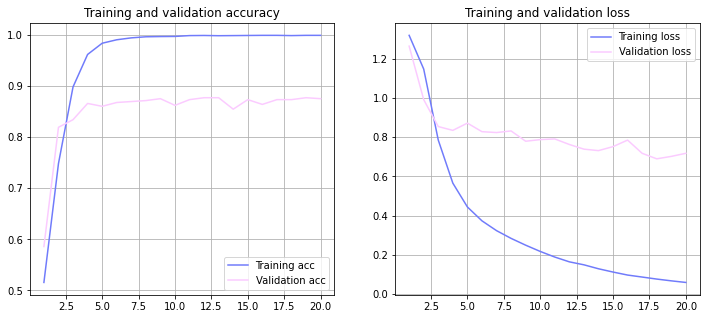

In [ ]:
plot_history(history)

In [ ]:
# setting a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#ffffff', '#fbcbff', '#707bfb']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

In [ ]:
def plot_confusion_matrix(matrix, fmt=''):

  plt.figure(figsize=(4, 3))
  sns.heatmap(matrix, annot=True, 
              cmap=cmap, 
              fmt=fmt)
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.savefig("/content/drive/MyDrive/Data712/BF/cnn+lstmCF_SVG.svg")
  plt.show()


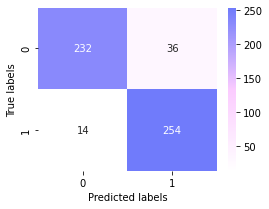

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(matrix)

In [ ]:
import pandas as pd
df=pd.DataFrame(history.history)

In [ ]:
df.to_csv("/content/drive/MyDrive/Data712/BF/hist2.csv")